## VC_1_Lab_04_MNIST_ML

Neste jupyter vamos tentar classificar imagens de dígitos feitos à mão com técnicas tradicionais de Machine Learning

A base de dados MNIST consiste em uma base de imagens de dígitos escritos à mão

### Visão Computacional 1

### Prof: José Humberto Cruvinel

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

In [1]:
!pip install sklearn

In [2]:
# Importando pacotes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [3]:
# Carregando o dataset DIGITS
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


Veja que temos 1797 imagens com 64 bits cada uma, 8 x 8 pixels em grayscale

In [4]:
#Vamos ver os dados da primeira imagem

print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [5]:
# Agora vamos ver como uma matriz 8 x 8

print(np.reshape(digits.data[0], (8,8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


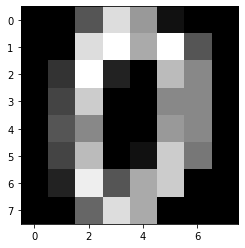

In [6]:
# Agora vamos ver como uma imagem em grayscale

plt.imshow(np.reshape(digits.data[0], (8,8)), cmap=plt.cm.gray)

Veja que a imagem acima e a planilha de intensidade de brilho com 64 bits (8 x 8) são a mesma coisa, sendo exibidas de forma diferente

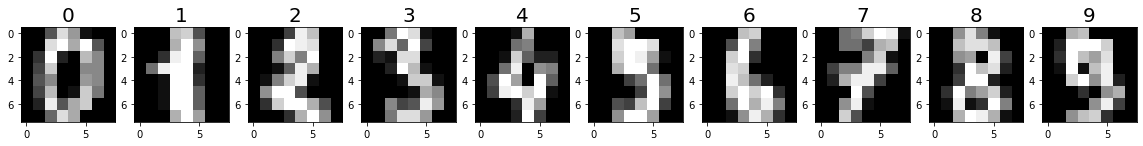

In [7]:
# Vamos plotar um pouco mais de imagens 
plt.figure(figsize=(20,5))
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:10])):
    plt.subplot(2, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i' % label, fontsize = 20)

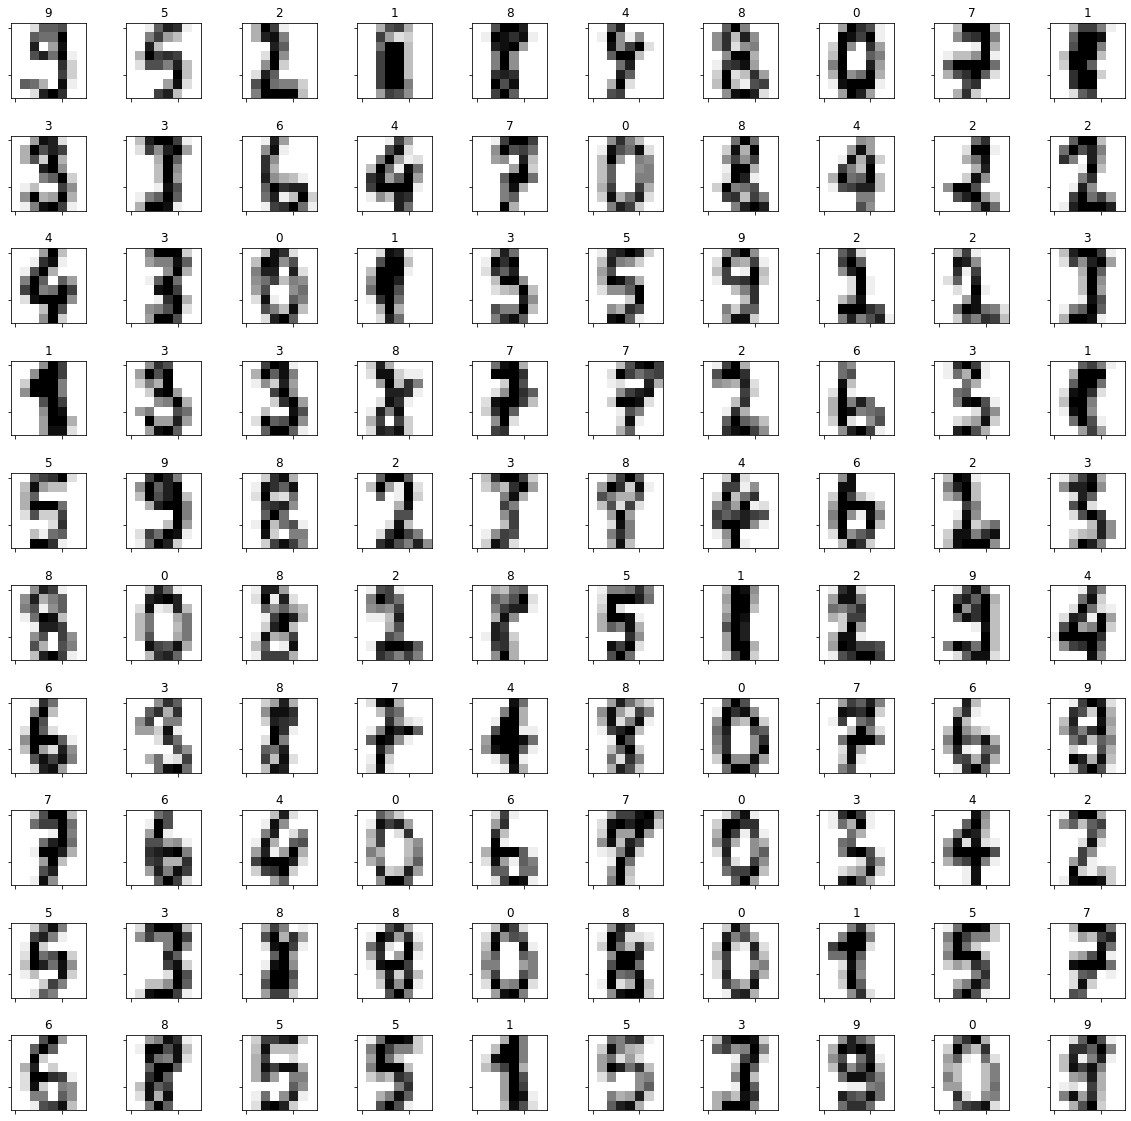

In [8]:
# Plotando de forma aleatória mais alguns exemplos do nosso dataset

def displayData(X,Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20,20))
    for i in range(10):
        for j in range(10):
            # Busca um exemplo aleatorio
            ind = np.random.randint(X.shape[0])
            ax[i,j].set_title("{}".format(Y[ind]))
            ax[i,j].imshow(X[ind,:].reshape(8,8), cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(digits.data,digits.target)

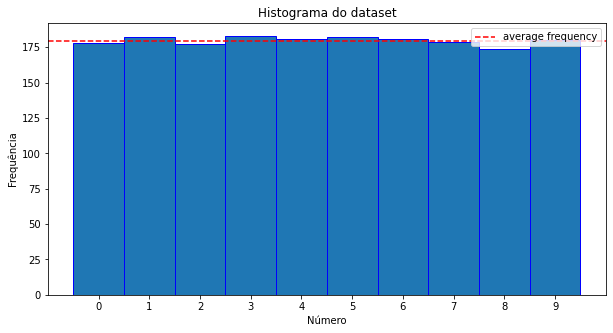

In [9]:
# Mostrando a distribuição dos exemplos do nosso dataset

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(digits.target,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align='left')
ax.set_title('Histograma do dataset')
ax.set(xlabel='Número', ylabel='Frequência')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9] );
ax.axhline(y=(digits.target.size/10), label="average frequency",linestyle='dashed', color='r')
ax.legend()

Como podemos ver acima, a distribuição de exemplos no nosso dataset está adequada, não sendo necessário nenhum ajuste no dataset

In [10]:
# Vamos verificar as dimensões dos dados de X e y

print("X Shape:", digits.data.shape)
print("y Shape:", digits.target.shape)

X Shape: (1797, 64)
y Shape: (1797,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1347, 64)
y_train: (1347,)
X_test: (450, 64)
y_test: (450,)


## Logistic Regression

In [12]:
# Testando a classificação com Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Label: 2 Previsão: 2')

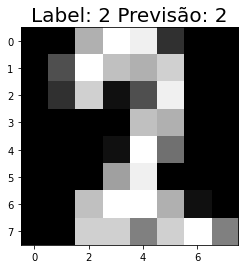

In [13]:
# Fazendo previsões
predictions = log_reg.predict(X_test)

# Imprimindo a primeira imagem e previsão
plt.imshow(np.reshape(X_test[0], (8,8)), cmap=plt.cm.gray)
plt.title('Label: {} Previsão: {}'.format(y_test[0] ,predictions[0]), fontsize = 20)

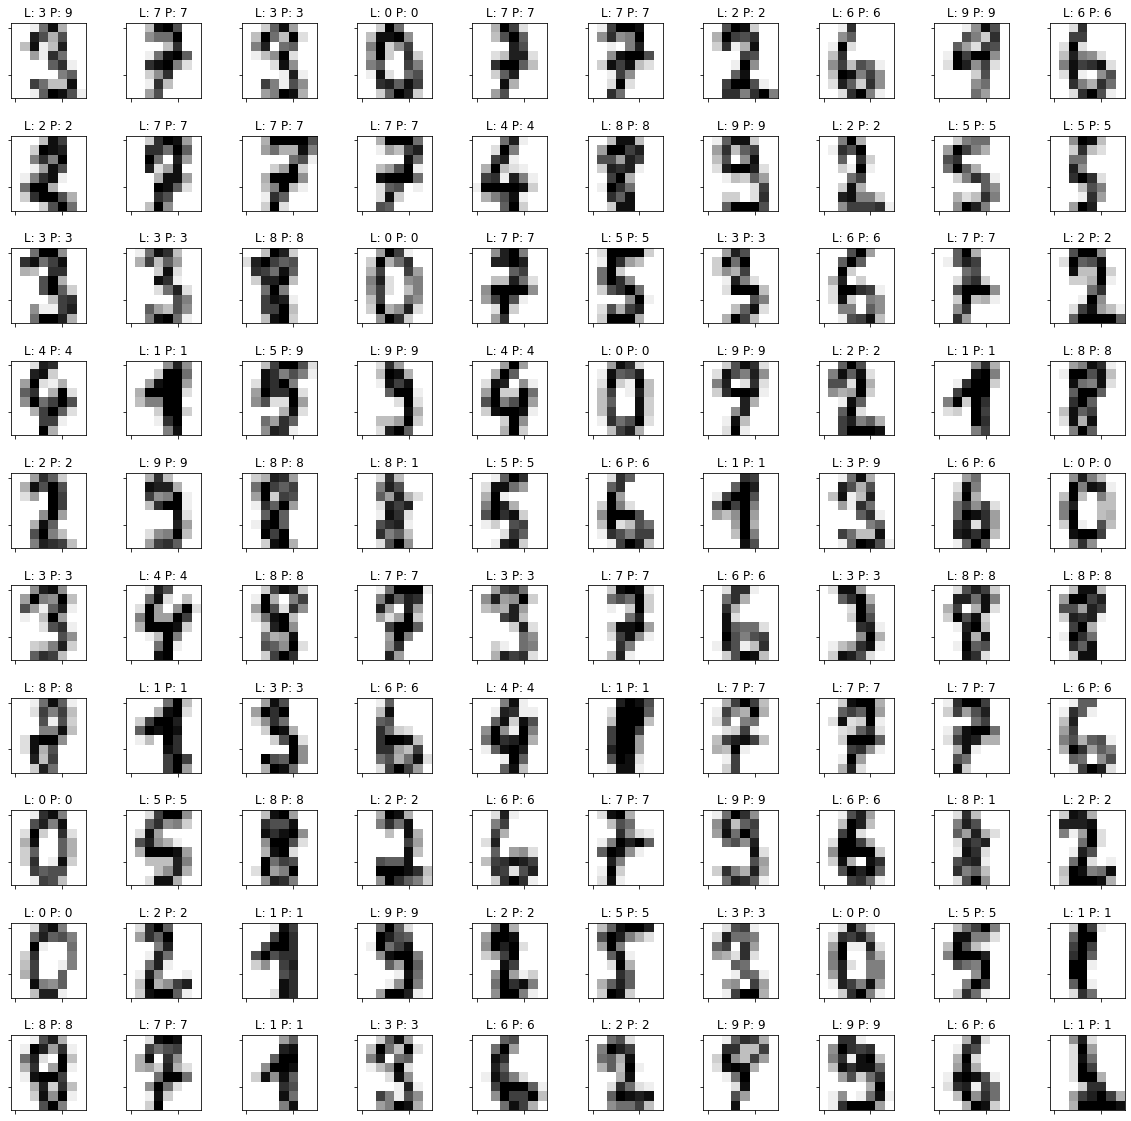

In [14]:
# Plotando vários exemplos
def displayData(X,Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20,20))
    for i in range(10):
        for j in range(10):
            # Busca um exemplo aleatorio
            ind = np.random.randint(X_test.shape[0])
            ax[i,j].set_title("L: {} P: {}".format(y_test[ind],predictions[ind]))
            ax[i,j].imshow(X_test[ind,:].reshape(8,8), cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(digits.data,digits.target)

Veja que poucos falharam, e os que falharam realmente estavam difíceis de acertar

In [15]:
# Vamos plotar o Score geral do modelo
score = log_reg.score(X_test, y_test)
print('Score:',score)

Score: 0.9511111111111111


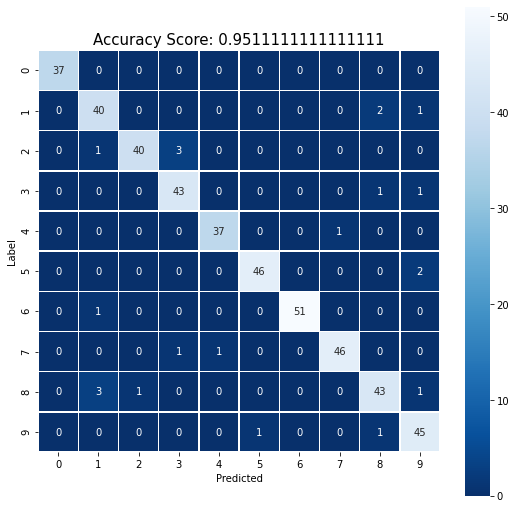

In [16]:
# Plotando a matriz de confusão para analisar a qualidade do nosso classificador

import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

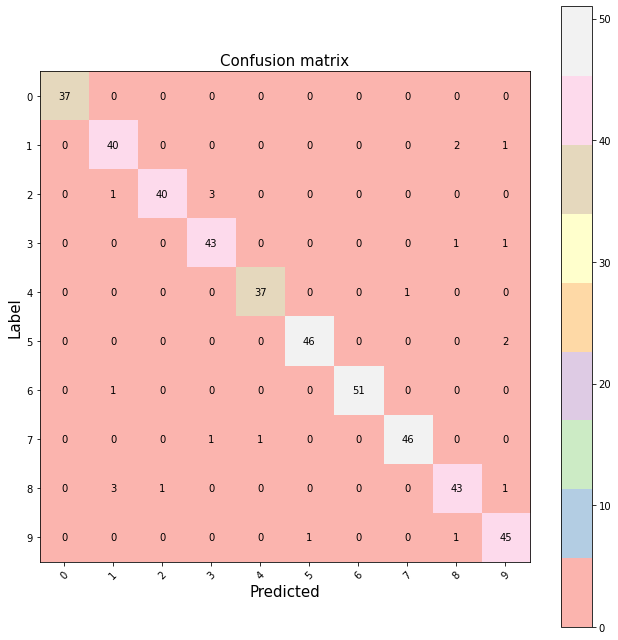

In [17]:
# Plotando a mesma matriz com matplotlib

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Label', size = 15)
plt.xlabel('Predicted', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# Exercício 4.1

Neste exercício fizemos a criação de um classificador de imagens MNIST com LogisticRegression

Faça novos testes de classificação utilizando os seguintes classificadores:

* sklearn.neighbors.KNeighborsClassifier (KNN)
 * Exemplo: https://www.back-prop.com/deep_learning/knn/mnist/2019/05/16/knn_classifier/
* sklearn.ensemble.RandomForrest
 * Exemplo: https://www.kaggle.com/ashwani07/mnist-classification-using-random-forest
* sklearn.svm.SVC (SVM)
 * Exemplo: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

Crie novas células abaixo para simular cada um desses algoritmos, lembrando de executar também as células para avaliar cada modelo.

Conseguiu obter um resultado melhor? Explique.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [19]:
knn_cls = KNeighborsClassifier()
knn_cls.fit(X_train,y_train)
knn_pred = knn_cls.predict(X_test)

In [20]:
knn_cls.score(X_test, y_test)

0.98

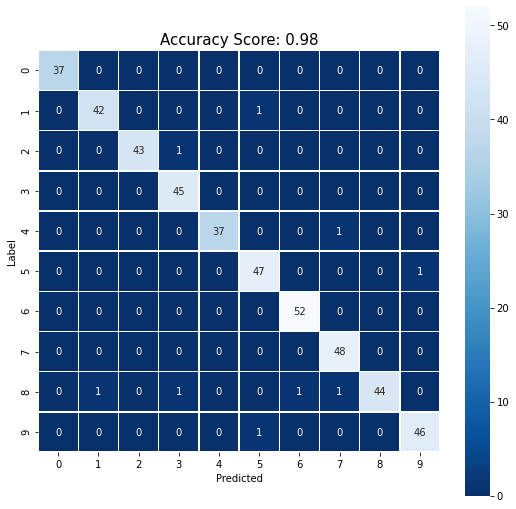

In [21]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(9,9))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(knn_cls.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train,y_train)
rf_pred = rf_cls.predict(X_test)

In [23]:
rf_cls.score(X_test, y_test)

0.9777777777777777

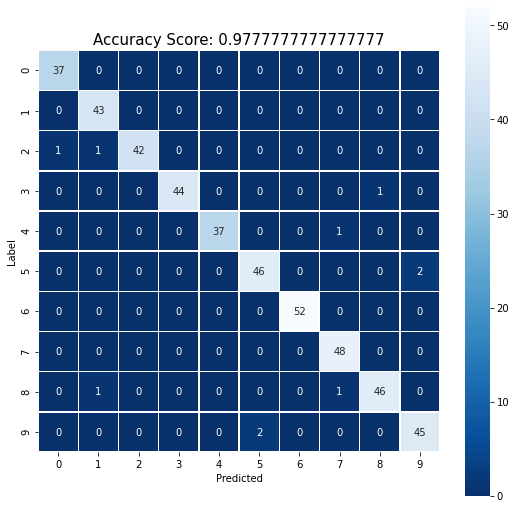

In [24]:
cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(rf_cls.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [25]:
from sklearn.svm import SVC
sv_cls = SVC()
sv_cls.fit(X_train,y_train)
sv_pred = sv_cls.predict(X_test)

In [26]:
sv_cls.score(X_test, y_test)

0.9911111111111112

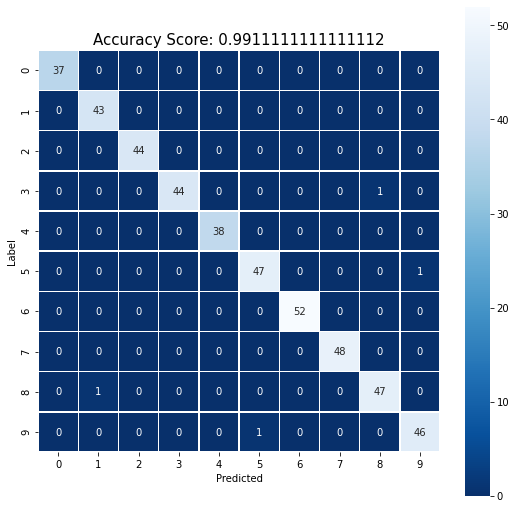

In [27]:
cm = metrics.confusion_matrix(y_test, sv_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(sv_cls.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

# Exercício 4.2

Crie um novo notebook a partir da cópia desse e dê o nome abaixo:

* **VC_1_Lab_04_MNIST_DNN_Ex_2**

Até agora utilizamos apenas um subset dos dados MNIST, ou seja, 1797 exemplos. 

O dataset oficial (http://yann.lecun.com/exdb/mnist/) possui 70.000 exemplos, sendo 60.000 de treino e 10.000 de teste

Logo, utilize os códigos abaixo para baixar todos os dados MNIST

```
%%time
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
print('Data shape:',mnist.data.shape)
print('Label shape:',mnist.target.shape)
```

Perceba que estamos utilizando o comando %%time para mostrar o tempo de processamento da célula de código. Quando trabalhamos com muitas imagens é importante saber quanto tempo leva o processamento.

Realize o mesmo processo utilizando os métodos já utilizados. 

Qual teve melhor resultado?

Quais dificuldades você observou ao tratar com um volume maior de imagens?

In [28]:
%%time
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print('Data shape:',X.shape)
print('Label shape:',y.shape)

Data shape: (70000, 784)
Label shape: (70000,)
CPU times: user 19 s, sys: 597 ms, total: 19.6 s
Wall time: 19.6 s


In [29]:
X_reshaped = np.reshape(X,(-1,28,28))

import cv2

X_resized = np.asarray([cv2.resize(img, dsize=(10,10), interpolation=cv2.INTER_CUBIC)for img in X_reshaped])

(70000, 10, 10)


Text(0.5, 1.0, 'Label: 5')

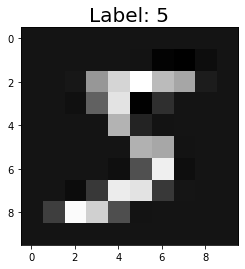

In [30]:
print(X_resized.shape) 
plt.imshow(X_resized[0], cmap=plt.cm.gray)
plt.title('Label: {}'.format(y[0]), fontsize = 20)


In [31]:
X_reshaped2 = X_resized.reshape(-1,100)

(70000, 100)


Text(0.5, 1.0, 'Label: 5')

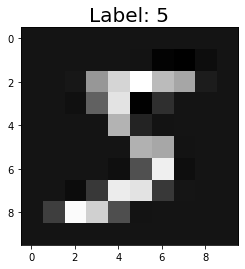

In [33]:
print(X_reshaped2.shape) 
plt.imshow(X_reshaped2[0].reshape(10,10), cmap=plt.cm.gray)
plt.title('Label: {}'.format(y[0]), fontsize = 20)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped2, y, test_size=0.25, random_state=0)

In [36]:
knn_cls = KNeighborsClassifier(n_jobs=-1)
rf_cls = RandomForestClassifier(n_jobs=-1)
sv_cls = SVC()

In [37]:
knn_cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
knn_pred = knn_cls.predict(X_test)

In [40]:
knn_score = knn_cls.score(X_test, y_test)

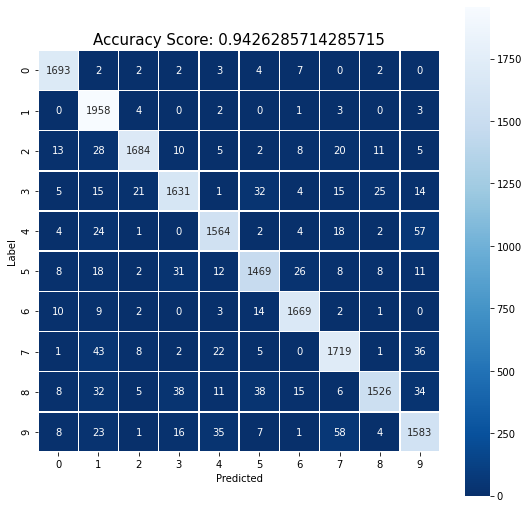

In [41]:
cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(knn_score)
plt.title(all_sample_title, size = 15);

In [42]:
rf_cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [43]:
rf_pred = rf_cls.predict(X_test)
rf_score = rf_cls.score(X_test, y_test)

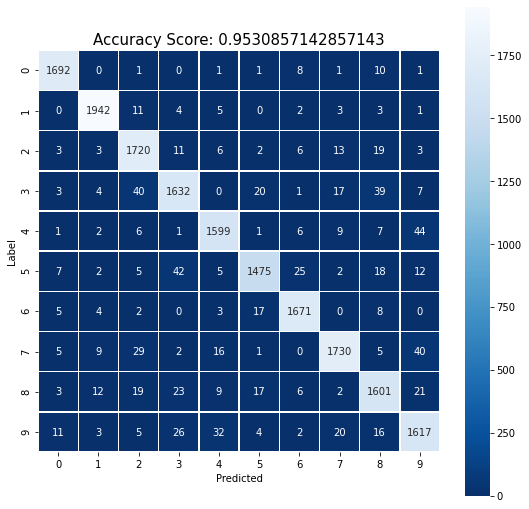

In [44]:
cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(rf_score)
plt.title(all_sample_title, size = 15);

In [45]:
sv_cls.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
sv_pred = sv_cls.predict(X_test)
sv_score = sv_cls.score(X_test, y_test)

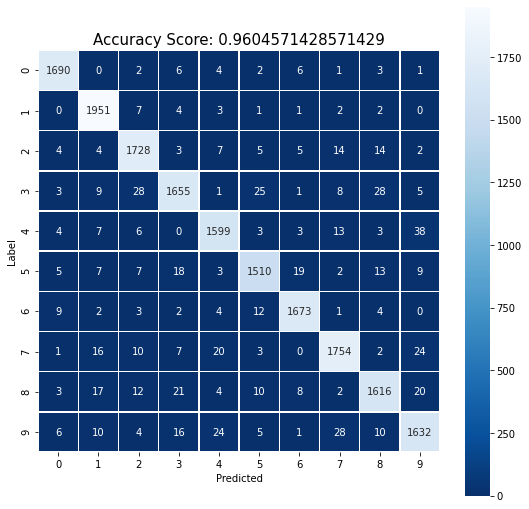

In [47]:
cm = metrics.confusion_matrix(y_test, sv_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(sv_score)
plt.title(all_sample_title, size = 15);

In [50]:
lg_reg = LogisticRegression()
lg_reg.fit(X_train, y_train)
lg_pred = lg_reg.predict(X_test)
lg_score = lg_reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


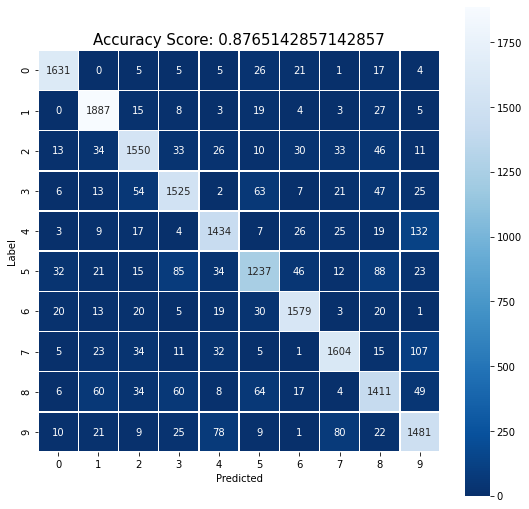

In [51]:
cm = metrics.confusion_matrix(y_test, lg_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(lg_score)
plt.title(all_sample_title, size = 15);

FIM